In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
res = np.array('''
3291.66	12.96	0.23	-
1469.45	16.46	0.81	3.31
2668.73	13.87	0.77	74.00
1597.60	16.10	0.78	0.46
2291.00	14.53	0.41	24.06

8864.85	8.65	0.08	-
4475.38	11.62	0.13	3.65
2605.74	13.97	0.71	74.00
1679.68	15.88	0.49	0.51
4898.49	11.23	0.16	12.23

2381.32	114.36	0.57	-
1316.65	16.94	0.89	2.78
2223.04	14.66	0.79	64.60
2024.98	15.07	0.79	0.41
2418.23	14.81	0.73	22.61

8400.47	8.89	0.10	-
3840.94	12.29	0.22	4.38
3442.14	12.76	0.79	64.60
1698.04	15.83	0.55	0.48
4808.97	11.31	0.18	26.44

2768.34	13.71	0.46	-
1155.99	17.50	0.89	3.38
1392.49	16.69	0.83	55.00
1411.07	16.64	0.81	0.40
2741.55	13.75	0.59	32.86

5235.78	10.94	0.11	-
888.72	18.64	0.87	3.80
2235.71	14.64	0.81	55.00
1276.98	17.07	0.74	0.47
2937.29	13.45	0.30	20.65

2781.50	13.69	0.32	-
1100.10	17.72	0.83	2.85
2229.52	14.65	0.68	65.51
1613.01	16.05	0.71	0.40
2590.91	14.00	0.49	24.34

9160.35	8.51	0.08	-
4411.67	11.68	0.14	0.14
2339.64	14.44	0.63	65.51
1832.59	15.50	0.44	0.48
5449.62	10.77	0.16	18.50

3162.77	13.13	0.39	-
1729.00	15.75	0.88	2.85
2284.75	14.54	0.80	72.82
3108.40	13.21	0.78	0.40
2759.60	13.72	0.51	26.02

5999.44	10.35	0.21	-
1571.75	16.17	0.70	4.28
3160.82	13.13	0.73	72.82
2392.20	14.34	0.67	0.47
3677.23	12.48	0.31	20.36
'''.split()).reshape(10, 5, 4)

In [3]:
dataset = '''
graph_laptop	graph_desktop
intro_laptop	intro_desktop
lecture_laptop	lecture_desktop
table_laptop	table_desktop
text_laptop	text_desktop
'''.split()

models = '''
Source
MopReM
MopNet
WDNet
SilentMoire
'''.split()

metrics = '''
mse	psnr	ssim	time
'''.split()

In [4]:
res_dict = {}
for data, p in zip(dataset, np.where(res == '-', 1e-2, res).astype(float)):
    if not data in res_dict.keys():
        res_dict[data] = {}
    for model, q in zip(models, p):
        if not model in res_dict[data].keys():
            res_dict[data][model] = {}
        for metric, r in zip(metrics, q):
            res_dict[data][model][metric] = r

In [5]:
res = []
datasets = ['graph_laptop', 'intro_desktop', 'lecture_desktop', 'table_laptop', 'text_laptop']

for model in models:
    ssim, time = np.array([[res_dict[data][model]['ssim'], res_dict[data][model]['time']]
                           for data in dataset if data in datasets]).mean(axis=0)
    res.append((model, ssim, time))
    
df = pd.DataFrame(res, columns=['Model', 'SSIM', 'Time'])
df

,Model,SSIM,Time
0,Source,0.230,0.010
1,MopReM,0.722,3.438
2,MopNet,0.770,66.386
3,WDNet,0.712,0.442
4,SilentMoire,0.378,24.302


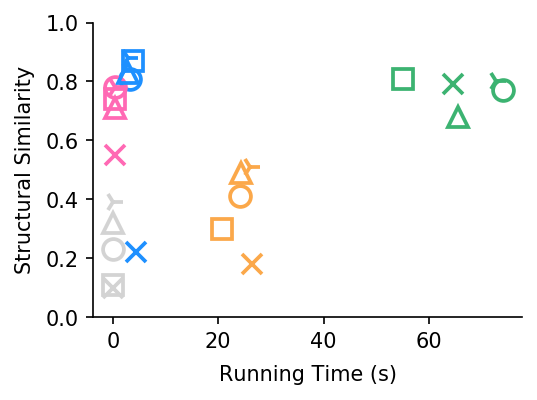

In [20]:
from brokenaxes import brokenaxes

def plotLocal():
    points  = []
    for data in datasets:
        for lib in libs:
            point = [lib, data, [res_dict[data][lib]['time']], [res_dict[data][lib]['ssim']]]
            points.append(point)

    bax = brokenaxes()
    for point in points :
        lib, data, x, y = point
        if len(x) != 0:
            bax.plot(x, y, label=lib,
                     c= dct[lib],  marker=dct1[data],
                    mfc='none', ms = 10, mew = 1.8)
    bax.set_ylabel('Structural Similarity', size = 10, labelpad=28)
    bax.set_ylim((0, 1))
    bax.set_xlabel('Running Time (s)', size = 10, labelpad=23)  ### Labelpad > space btw xaxis and xlabel
    plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
    plt.tight_layout()
    plt.savefig('FIG/fig1.svg', bbox_inches='tight', pad_inches=0)
    
markers = ("o", "x", "s", "^", "4")
colors = ('lightgray', 'dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

libs = models
f = lambda m,c: plt.plot([],[], color=c, marker = m,
                         mfc='none', ms = 10, mew = 1.8,
                            ls="none")[0]
f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

dct = {}
dct1 = {}
for color, lib in zip(colors, libs):
    dct[lib] = color
for data, marker in zip(datasets, markers):
    dct1[data] = marker

fig = plt.figure(figsize = (4, 3), dpi = 150,)
plotLocal()

In [7]:
points = []
for data in dataset:
    points.append((data, res_dict[data]['MopReM']['mse'], res_dict[data]['Source']['mse'], res_dict[data]['MopNet']['mse'], res_dict[data]['WDNet']['mse'], res_dict[data]['SilentMoire']['mse']))
points = np.array(points)

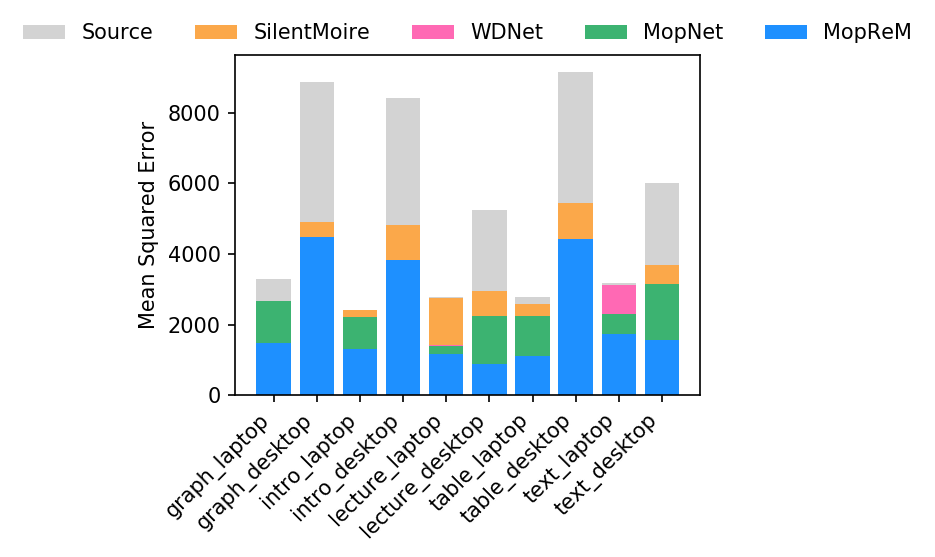

In [19]:
fig = plt.figure(figsize = (4, 3), dpi = 150,)
plt.bar(points[:,0], points[:,2].astype(np.float), color=colors[0])
plt.bar(points[:,0], points[:,5].astype(np.float), color=colors[4])
plt.bar(points[:,0], points[:,4].astype(np.float), color=colors[3])
plt.bar(points[:,0], points[:,3].astype(np.float), color=colors[2])
plt.bar(points[:,0], points[:,1].astype(np.float), color=colors[1])
plt.legend(loc='upper center', labels=["Source", "SilentMoire", "WDNet", "MopNet", "MopReM"], bbox_to_anchor=(0.5, 1.15), ncol=5, frameon=False)
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Mean Squared Error')
#plt.grid(True, axis='y', which='major', alpha=0.5)
plt.savefig('FIG/fig2.svg', bbox_inches='tight', pad_inches=0)

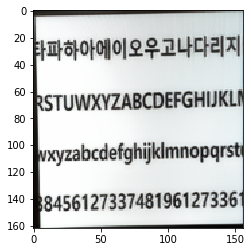

In [10]:
plt.imshow(mopnet)

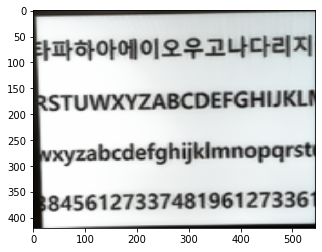

In [15]:
dsize = (target.shape[1], target.shape[0])
re = cv2.resize(mopnet, dsize)
plt.imshow(re)

<Figure size 432x288 with 0 Axes>

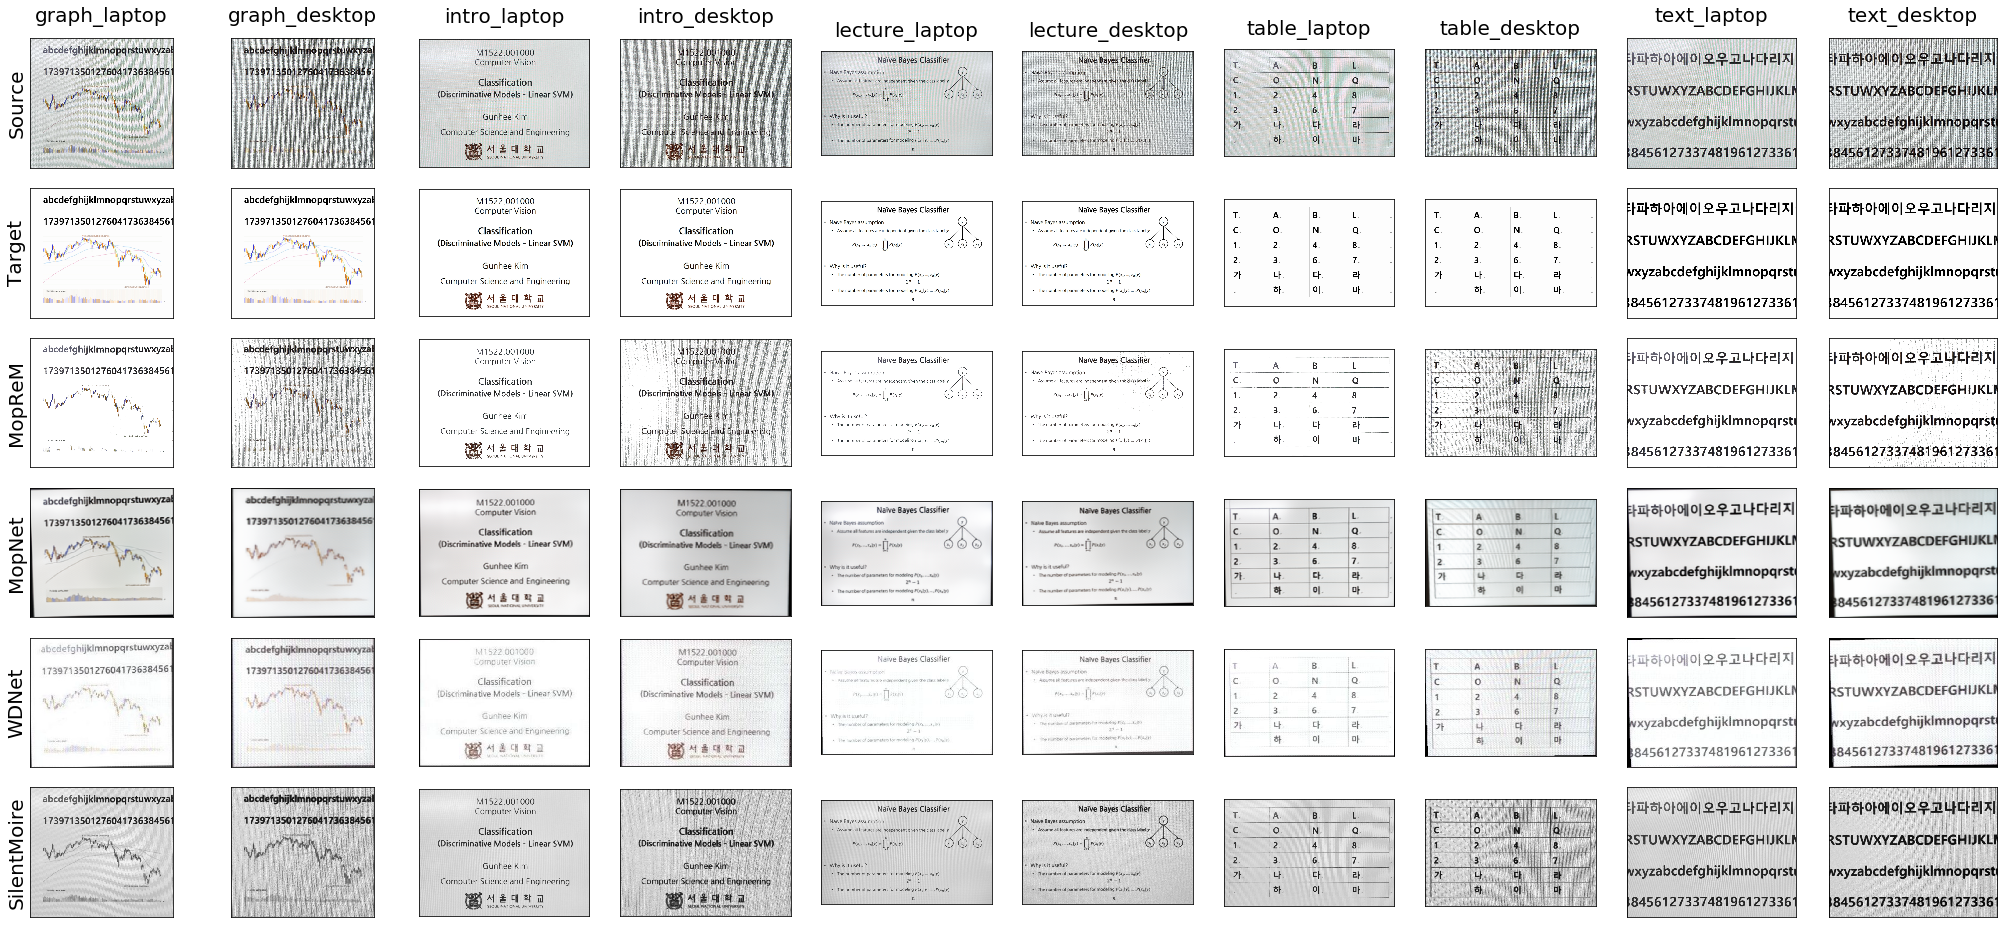

In [21]:
import cv2

plt.close()
plt.figure()
nrows = 6
_, axes = plt.subplots(nrows=nrows, ncols=10, sharex=False, sharey=False, figsize=(28,13))

for j, data in enumerate(dataset):
    source = cv2.imread(f"{data}/source_cropped.png")
    target = cv2.imread(f"{data}/target_cropped.png")
    clean  = cv2.imread(f"{data}/clean_cropped.png")
    
    dsize = (target.shape[1], target.shape[0])
    mopnet = cv2.resize(cv2.imread(f"{data}/mopnet.png"), dsize)
    wdnet  = cv2.resize(cv2.imread(f"{data}/wdnet.png"), dsize)
    silent = cv2.resize(cv2.imread(f"{data}/silentmoire.png"), dsize)
    
    axes[0,j].imshow(source)
    axes[1,j].imshow(target)
    axes[2,j].imshow(clean)
    axes[3,j].imshow(mopnet)
    axes[4,j].imshow(wdnet)
    axes[5,j].imshow(silent)
    
    axes[0,j].set_title(data, size=20, y=1.08)
    for i in range(nrows):
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

axes[0,0].set_ylabel("Source", size=20)
axes[1,0].set_ylabel("Target", size=20)
for i, model in enumerate(models[1:]):
    if i+2 < nrows:
        axes[i+2,0].set_ylabel(model, size=20)

plt.tight_layout()
plt.savefig('FIG/fig3.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

<Figure size 432x288 with 0 Axes>

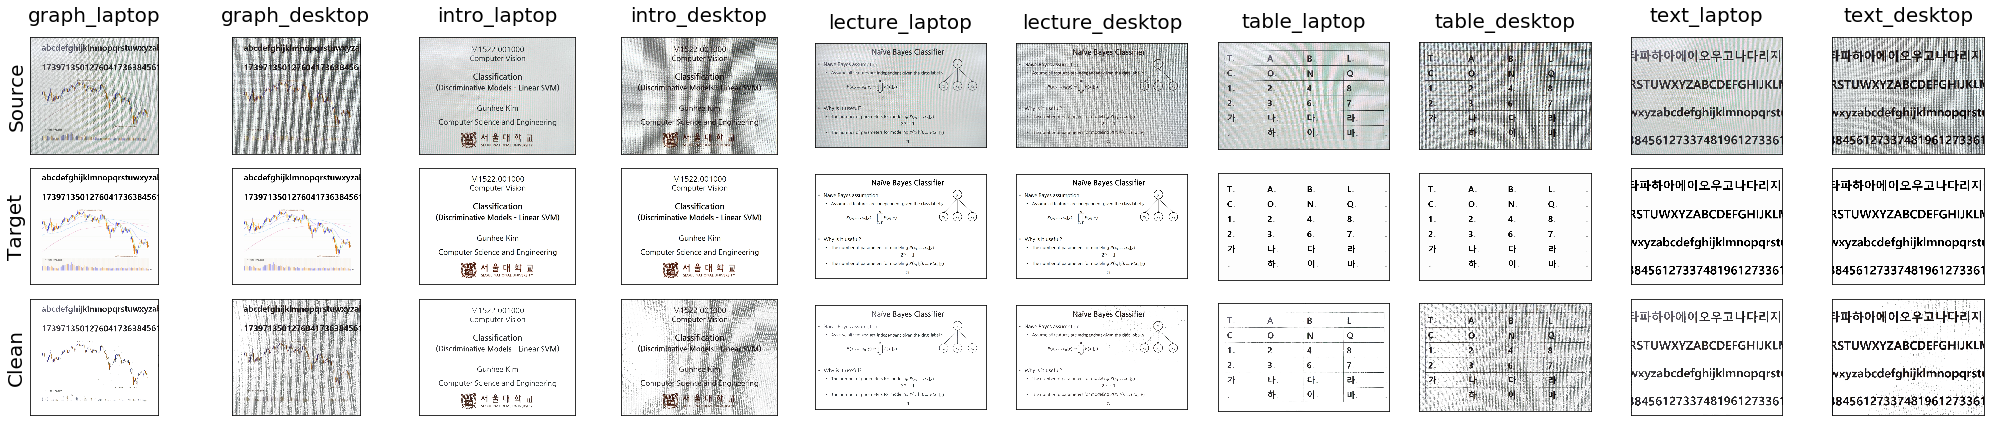

In [22]:
import cv2

plt.close()
plt.figure()
nrows = 3
_, axes = plt.subplots(nrows=nrows, ncols=10, sharex=False, sharey=False, figsize=(28,6))

for j, data in enumerate(dataset):
    source = cv2.imread(f"{data}/source_cropped.png")
    target = cv2.imread(f"{data}/target_cropped.png")
    clean = cv2.imread(f"{data}/clean_cropped.png")
    
    axes[0,j].imshow(source)
    axes[1,j].imshow(target)
    axes[2,j].imshow(clean)
    
    axes[0,j].set_title(data, size=20, y=1.08)
    for i in range(nrows):
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

axes[0,0].set_ylabel("Source", size=20)
axes[1,0].set_ylabel("Target", size=20)
axes[2,0].set_ylabel("Clean", size=20)

plt.tight_layout()
plt.savefig('FIG/fig4.pdf', bbox_inches='tight', pad_inches=0, dpi=300)